## a PID control for an oven using sympy

We consider an oven whose simplified uncontrolled dynamics can be described by means of
$$
\dot{y}(t) = -k \big( y(t) - a(t) \big) + u(t)
$$
(i.e., a Newton cooling ODE) where
* $k$ is the cooling constant
* $a(t)$ is the ambient temperature
* $u(t)$ is the control action.

The goal is to design and test a PID controller, i.e., a controller whose structure is
$$
u = K_p e + K_i \int e + K_d \dot{e}
$$
where $e(t)$ is the error defined by $y(t) - r(t)$, with $r(t)$ eventually the reference temperature that the oven should follow - a signal that is assumed having been defined by the user a priori.

In [1]:
# import the necessary packages
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# define the various signals and variables that identify the problem
t  = sp.symbols('t', real=True) # 'time'
s  = sp.symbols('s')            # 's' for the Laplace domain
r  = 3*sp.Heaviside(t - 20)     # reference signal (0 for t<20, 3 for t>=20)
y0 = 5                          # initial condition on the temperature of the oven
k  = 10                         # heat transfer coefficient defining the ODE

3⋅θ(t - 20)


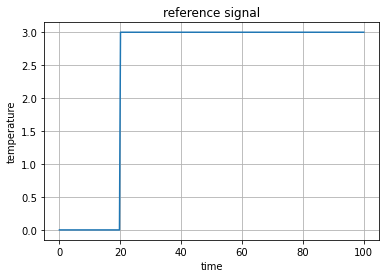

In [4]:
# just in case, plot the reference signal
sp.pprint(r)

# 'lambdify' the symbolic function
lambdified_r = sp.lambdify( t, r )
lambdified_t = np.linspace( 0, 100, 300)

# plot it
plt.plot(lambdified_t, lambdified_r(lambdified_t))
plt.title('reference signal')
plt.xlabel('time')
plt.ylabel('temperature')
plt.grid(True)

In [27]:
# choose the control gains for the PID controller
Kp = 10
Ki = 4/10
Kd = 0

In [28]:
# define the transfer functions of the plant G(s) and of the controller C(s)
G = 1/(s+k)
C = Kp + Ki/s + Kd*s

# write then the closed-loop transfer function
W = (G*C/(1+G*C)).simplify()

# print then all the various transfer functions
sp.pprint(G)
sp.pprint(C)
sp.pprint(W)

  1   
──────
s + 10
     0.4
10 + ───
      s 
       10⋅s + 0.4      
───────────────────────
s⋅(s + 10) + 10⋅s + 0.4


In [29]:
# compute the forced response by means of Laplace transforms

# Laplace the reference
# note: the "noconds=True" makes us get only the transform as an output
R = sp.laplace_transform(r, t, s, noconds=True)

# compute the forced response in the Laplace domain
Y = (R * W).simplify()

# print the outputs
sp.pprint(R)
sp.pprint(Y)

   -20⋅s
3⋅ℯ     
────────
   s    
                  -20⋅s    
    (30⋅s + 1.2)⋅ℯ         
───────────────────────────
s⋅(s⋅(s + 10) + 10⋅s + 0.4)


<lambdifygenerated-5>:2: RuntimeWarning: overflow encountered in exp
  return 1.0*(-5.24797988178263e+173*exp(0.0200200401002808*t) - 2.23863411571975*exp(19.9799799598997*t) + 3.00000000000001*exp(20.0*t))*exp(-20.0*t)*select([less(t, 20),equal(t, 20),greater(t, 20)], [0,1/2,1], default=nan)
<lambdifygenerated-5>:2: RuntimeWarning: overflow encountered in multiply
  return 1.0*(-5.24797988178263e+173*exp(0.0200200401002808*t) - 2.23863411571975*exp(19.9799799598997*t) + 3.00000000000001*exp(20.0*t))*exp(-20.0*t)*select([less(t, 20),equal(t, 20),greater(t, 20)], [0,1/2,1], default=nan)
<lambdifygenerated-5>:2: RuntimeWarning: invalid value encountered in add
  return 1.0*(-5.24797988178263e+173*exp(0.0200200401002808*t) - 2.23863411571975*exp(19.9799799598997*t) + 3.00000000000001*exp(20.0*t))*exp(-20.0*t)*select([less(t, 20),equal(t, 20),greater(t, 20)], [0,1/2,1], default=nan)


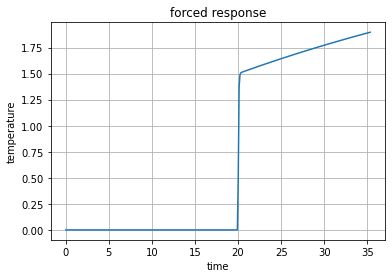

In [30]:
# transform the forced response back in the time domain
y_for = sp.inverse_laplace_transform(Y, s, t)

# 'lambdify' the symbolic function
lambdified_y = sp.lambdify( t, y_for )
lambdified_t = np.linspace( 0, 100, 1000)

# plot it
plt.plot(lambdified_t, lambdified_y(lambdified_t))
plt.title('forced response')
plt.xlabel('time')
plt.ylabel('temperature')
plt.grid(True)